## 計算梯度

In [11]:
def func(x):
    return x ** 2 

def dfunc(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / (h)


In [12]:
func(3)

9

In [13]:
dfunc(func, 3)

6.000100000012054

In [15]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y


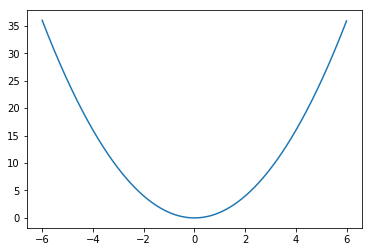

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)


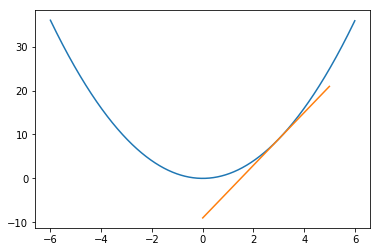

In [18]:
# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)

In [19]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)


In [20]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)


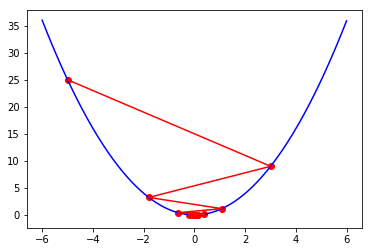

In [22]:
x = gradient_descent(func, -5, lr=0.8)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


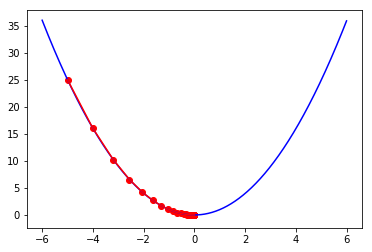

In [24]:
x = gradient_descent(func, -5, lr=0.1)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


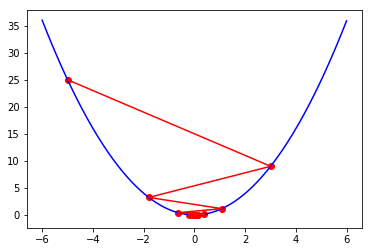

In [25]:
x = gradient_descent(func, -5, lr=0.8)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


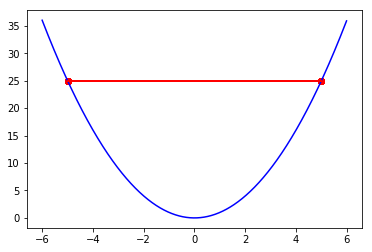

In [26]:
x = gradient_descent(func, -5, lr=1)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


## 計算神經網路的梯度

In [29]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


In [30]:
# 初始網路
x  = np.array([0.6, 0.9])
np.random.seed(42)
weight   = np.random.randn(2,3)
z        = np.dot(x, weight)
# 取得預測值 y_hat
y_hat    = softmax_function(z)

# 計算代價(損失)
y        = np.array([0, 0, 1])
cross_entropy_err(y_hat, y)


1.8025260716416405

In [31]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad


In [32]:
def predict(x):
    return np.dot(x, weight)

def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

func = lambda w: loss(x, y)
dfunc(func, weight)


array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

In [33]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [34]:
net = ANN(input_size=4, hidden_size=5, output_size=3)


In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data


In [36]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
y = np.zeros((len(iris.target), 3))
y[0:3,]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [40]:
y[0:3,]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [41]:
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)

In [43]:
train_loss[-30:-1]

[760.5381366815425,
 760.6867013479335,
 760.5363002899057,
 760.6847167769483,
 760.534463056217,
 760.6827312154254,
 760.532624977998,
 760.6807446603847,
 760.530786052618,
 760.6787571093881,
 760.5289462776414,
 760.6767685591974,
 760.527105650397,
 760.6747790073573,
 760.5252641684525,
 760.6727884511912,
 760.5234218289927,
 760.670796887834,
 760.5215786298094,
 760.6688043146635,
 760.5197345680642,
 760.6668107287967,
 760.5178896415541,
 760.6648161279754,
 760.5160438476676,
 760.662820509113,
 760.5141971839146,
 760.6608238697987,
 760.512349647753]

Text(0.5,1,'Training Loss')

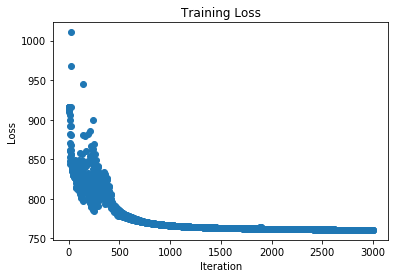

In [44]:


plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')


In [48]:
predicted = np.argmax(net.predict(x), axis = 1)

In [52]:
sum(predicted == iris.target) / len(iris.target)

0.98

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.98

In [54]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])